In [4]:
import os
import pandas as pd


# Directory path containing the CSV files
directory_path = '/home/ldy/Workspace/BrainAligning_retrieval/outputs/growing_window'
# Function to calculate the averages of the last 10 epochs
def calculate_averages(file_path):
    df = pd.read_csv(file_path)
    last_10_epochs = df.tail(10)
    averages = {
        'test_accuracy': last_10_epochs['test_accuracy'].mean(),  # TOP1 accuracy
        'top5_acc': last_10_epochs['top5_acc'].mean()  # TOP5 accuracy
    }
    return averages

# Dictionary to store the results
results = {}

# Iterate over each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory_path, filename)
        results[filename] = calculate_averages(file_path)

# Sort the results by model (filename)
sorted_results = dict(sorted(results.items()))

# Display the results
for model, averages in sorted_results.items():
    print(f"Model: {model}")
    for metric, value in averages.items():
        # Convert to percentage and format with 2 decimal places
        formatted_value = "{:.2f}".format(value * 100)
        print(f"{metric}: {formatted_value}")
    print()

Model: ATM_S_reconstruction_scale_0_1000_sub-01.csv
test_accuracy: 28.05
top5_acc: 59.85

Model: ATM_S_reconstruction_scale_0_1000_sub-02.csv
test_accuracy: 25.35
top5_acc: 57.65

Model: ATM_S_reconstruction_scale_0_1000_sub-03.csv
test_accuracy: 27.25
top5_acc: 66.75

Model: ATM_S_reconstruction_scale_0_1000_sub-04.csv
test_accuracy: 31.35
top5_acc: 64.50

Model: ATM_S_reconstruction_scale_0_1000_sub-05.csv
test_accuracy: 20.25
top5_acc: 47.10

Model: ATM_S_reconstruction_scale_0_1000_sub-06.csv
test_accuracy: 18.90
top5_acc: 46.90

Model: ATM_S_reconstruction_scale_0_1000_sub-07.csv
test_accuracy: 31.25
top5_acc: 63.20

Model: ATM_S_reconstruction_scale_0_1000_sub-08.csv
test_accuracy: 38.85
top5_acc: 70.60

Model: ATM_S_reconstruction_scale_0_1000_sub-09.csv
test_accuracy: 29.55
top5_acc: 60.80

Model: ATM_S_reconstruction_scale_0_1000_sub-10.csv
test_accuracy: 31.95
top5_acc: 67.15

Model: ATM_S_reconstruction_scale_0_100_sub-01.csv
test_accuracy: 2.55
top5_acc: 14.10

Model: ATM_S

In [5]:
import os
import pandas as pd

# Directory path containing the CSV files
directory_path = '../outputs'

# Function to calculate the average of the last 10 epochs for a file
def calculate_last_10_average(file_path):
    df = pd.read_csv(file_path)
    last_10_epochs = df.tail(10)
    return {

        'test_accuracy': last_10_epochs['test_accuracy'].mean(),
        'top5_acc': last_10_epochs['top5_acc'].mean()
    }

# Group files by method and separate cross_exclude results
method_groups = {}
cross_exclude_groups = {}

for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory_path, filename)

        # Extract the part of the filename before the subject identifier
        method_name = filename.rsplit('_', 1)[0]

        if 'cross_exclude' in filename:
            # Handling cross_exclude results
            if method_name not in cross_exclude_groups:
                cross_exclude_groups[method_name] = {}
            cross_exclude_groups[method_name][filename] = calculate_last_10_average(file_path)
        else:
            # Handling regular results
            if method_name not in method_groups:
                method_groups[method_name] = {}
            method_groups[method_name][filename] = calculate_last_10_average(file_path)

# Define a function to calculate averages and standard deviations
def calculate_averages_and_stds(groups):
    results = {}
    metrics = ['test_accuracy', 'top5_acc']
    for method, subjects in groups.items():
        results[method] = {metric: {'mean': 0, 'std': 0} for metric in metrics}
        for metric in metrics:
            all_subjects_metric = [subjects[filename][metric] for filename in subjects]
            results[method][metric]['mean'] = sum(all_subjects_metric) / len(all_subjects_metric)
            results[method][metric]['std'] = pd.Series(all_subjects_metric).std()
    return results

# Calculate and display the results
regular_results = calculate_averages_and_stds(method_groups)
cross_exclude_results = calculate_averages_and_stds(cross_exclude_groups)

print("Regular Results:")
for method, metrics in regular_results.items():
    print(f"Method: {method}")
    for metric, values in metrics.items():
        mean = "{:.2f}".format(values['mean'] * 100)
        std = "{:.2f}".format(values['std'] * 100)
        print(f"{metric} - Average: {mean}, Standard Deviation: {std}")
    print()

print("Cross-Exclude Results:")
for method, metrics in cross_exclude_results.items():
    print(f"Method: {method}")
    for metric, values in metrics.items():
        mean = "{:.2f}".format(values['mean'] * 100)
        std = "{:.2f}".format(values['std'] * 100)
        print(f"{metric} - Average: {mean}, Standard Deviation: {std}")
    print()
    
    

Regular Results:
Method: ATM_S_reconstruction_scale_0_500
test_accuracy - Average: 28.40, Standard Deviation: 4.51
top5_acc - Average: 59.08, Standard Deviation: 7.69

Method: ATM_S_reconstruction_scale_0_900
test_accuracy - Average: 30.06, Standard Deviation: 6.44
top5_acc - Average: 62.13, Standard Deviation: 6.35

Method: ATM_S_reconstruction_scale_0_1000
test_accuracy - Average: 28.27, Standard Deviation: 5.84
top5_acc - Average: 60.45, Standard Deviation: 8.04

Method: ATM_S_reconstruction_scale_0_300
test_accuracy - Average: 19.42, Standard Deviation: 3.95
top5_acc - Average: 49.36, Standard Deviation: 7.37

Method: ATM_S_reconstruction_scale_0_200
test_accuracy - Average: 12.29, Standard Deviation: 3.81
top5_acc - Average: 35.04, Standard Deviation: 6.93

Method: ATM_S_reconstruction_scale_0_100
test_accuracy - Average: 3.17, Standard Deviation: 0.93
top5_acc - Average: 12.35, Standard Deviation: 2.26

Method: ATM_S_reconstruction_scale_0_800
test_accuracy - Average: 26.93, Stan

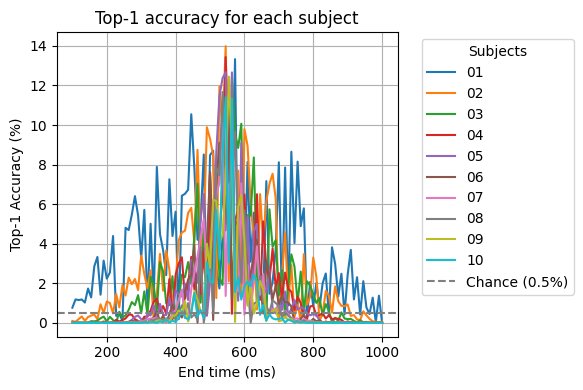

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming we have 10 subjects, and we generate synthetic data similar to the plot provided
np.random.seed(0)  # For reproducibility
subjects = range(1, 11)
time_ms = np.linspace(100, 1000, 100)  # Time from 100ms to 1000ms
accuracy_data = np.random.rand(10, 100)  # Random data for illustration

# Modifying the data to mimic the pattern in the provided plot
# The peak accuracy occurs around the middle and then drops
peak_time = 50  # Index for peak time around 500ms
for i in range(10):
    accuracy_data[i, :peak_time] *= (np.linspace(0.1, 1, peak_time) ** (i + 1))
    accuracy_data[i, peak_time:] *= np.flip(np.linspace(0.1, 1, 100 - peak_time) ** (i + 1))

# Plotting each subject
plt.figure(figsize=(6, 4))
for i, subject in enumerate(subjects):
    plt.plot(time_ms, accuracy_data[i] * 14, label=f"0{subject}" if subject < 10 else str(subject))  # Scale to match the y-axis

# Adding chance level line
plt.axhline(y=0.5, color='grey', linestyle='--', label='Chance (0.5%)')

# Customizing the plot to match the provided image
plt.xlabel('End time (ms)')
plt.ylabel('Top-1 Accuracy (%)')
plt.title('Top-1 accuracy for each subject')
plt.legend(title='Subjects', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re

# Directory path containing the CSV files
directory_path = '/home/ldy/Workspace/BrainAligning_retrieval/conditional_outputs/growing_window'  # Update with your actual path

# Function to calculate the max values of the metrics
def calculate_max_values(file_path):
    df = pd.read_csv(file_path)
    max_values = {
        'test_accuracy': df['test_accuracy'].max() * 100,  # Convert to percentage
        'top5_acc': df['top5_acc'].max() * 100  # Convert to percentage
    }
    return max_values

# Regular expression pattern to extract growing window and subject
pattern = re.compile(r'(\d+_\d+)_sub-(\d+)\.csv$')

# Dictionary to store the results by subject and window
results = {'test_accuracy': {}, 'top5_acc': {}}

# Iterate over each file in the directory
for filename in os.listdir(directory_path):
    match = pattern.search(filename)
    if match:
        window, subject = match.groups()
        window_size = int(window.split('_')[1])  # Assuming window is like '0_100'
        if subject not in results['test_accuracy']:
            results['test_accuracy'][subject] = []
            results['top5_acc'][subject] = []
        file_path = os.path.join(directory_path, filename)
        max_values = calculate_max_values(file_path)
        results['test_accuracy'][subject].append((window_size, max_values['test_accuracy']))
        results['top5_acc'][subject].append((window_size, max_values['top5_acc']))

# Sort the results by window size for each subject
for metric in results:
    for subject in results[metric]:
        results[metric][subject].sort()

# Plotting test_accuracy (TOP1) for all subjects

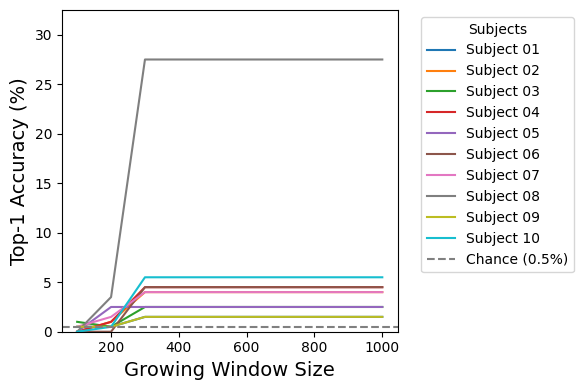

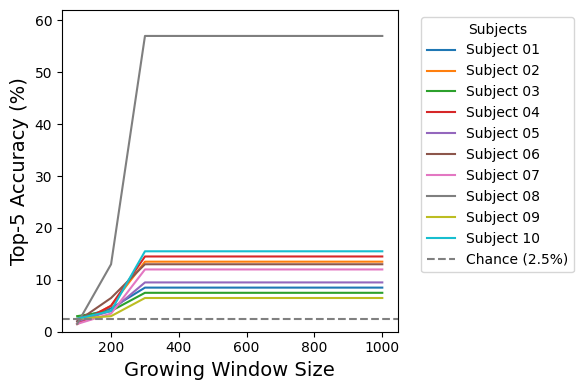

In [18]:
# Plotting test_accuracy (TOP1) for all subjects
plt.figure(figsize=(6, 4))
max_accuracy_top1 = 0  # Initialize the maximum accuracy variable for Top-1
for subject in sorted(results['test_accuracy']):
    window_sizes, accuracies = zip(*results['test_accuracy'][subject])
    max_accuracy_top1 = max(max_accuracy_top1, max(accuracies))  # Update the maximum accuracy
    plt.plot(window_sizes, accuracies, label=f"Subject {subject}")
plt.axhline(y=0.5, color='grey', linestyle='--', label='Chance (0.5%)')
plt.xlabel('Growing Window Size', fontsize=14)
plt.ylabel('Top-1 Accuracy (%)', fontsize=14)
plt.legend(title='Subjects', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)
plt.ylim(0, max_accuracy_top1 + 5)  # Dynamically set the max value with a small margin
plt.tight_layout()
plt.savefig('Adaptive_Growing_window_top1.png', dpi=300, bbox_inches='tight')
plt.show()

# Plotting top5_acc (TOP5) for all subjects
plt.figure(figsize=(6, 4))
max_accuracy_top5 = 0  # Initialize the maximum accuracy variable for Top-5
for subject in sorted(results['top5_acc']):
    window_sizes, accuracies = zip(*results['top5_acc'][subject])
    max_accuracy_top5 = max(max_accuracy_top5, max(accuracies))  # Update the maximum accuracy
    plt.plot(window_sizes, accuracies, label=f"Subject {subject}")
plt.axhline(y=2.5, color='grey', linestyle='--', label='Chance (2.5%)')
plt.xlabel('Growing Window Size', fontsize=14)
plt.ylabel('Top-5 Accuracy (%)', fontsize=14)
plt.legend(title='Subjects', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)
plt.ylim(0, max_accuracy_top5 + 5)  # Dynamically set the max value with a small margin
plt.tight_layout()
plt.savefig('Adaptive_Growing_window_top5.png', dpi=300, bbox_inches='tight')
plt.show()

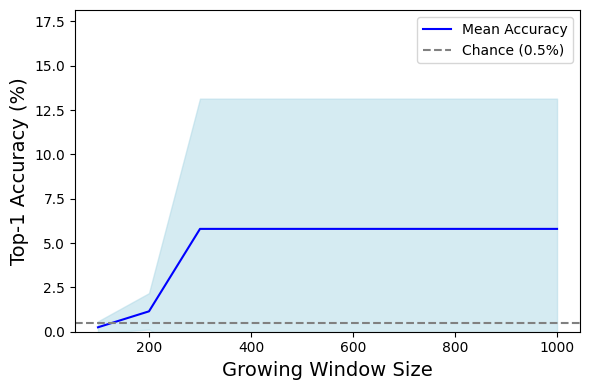

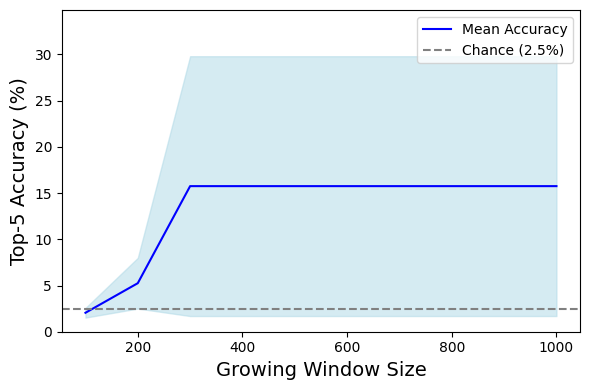

In [15]:
def plot_avg_std(metric, ylabel, chance_level, chance_label, save_path):
    plt.figure(figsize=(6, 4))
    windows = sorted(results[metric].keys())
    means = [np.mean(results[metric][w]) * 100 for w in windows]
    stds = [np.std(results[metric][w]) * 100 for w in windows]
    
    # Calculate max y-value as the highest mean + std, then add a small margin
    max_y_value = max(means[i] + stds[i] for i in range(len(means))) + 5

    plt.plot(windows, means, color='blue', label='Mean Accuracy')
    plt.fill_between(windows, np.array(means) - np.array(stds), np.array(means) + np.array(stds), color='lightblue', alpha=0.5)
    plt.axhline(y=chance_level, color='grey', linestyle='--', label=chance_label)
    
    plt.xlabel('Growing Window Size', fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.legend()
    # plt.grid(True)
    plt.ylim(0, max_y_value)  # Set the y-axis to start from 0 and dynamically adjust the max value
    plt.tight_layout()
    
    # Save the figure with the highest resolution
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

# Adjust the directory path as needed
save_directory = './'  # Update this path as per your requirements

# Plot and save the average test_accuracy (TOP1) across subjects with standard deviation
plot_avg_std(
    'test_accuracy', 
    'Top-1 Accuracy (%)', 
    0.5, 
    'Chance (0.5%)',
    save_path=os.path.join(save_directory, 'Adaptive_Growing_window_top1_high_res.png')
)

# Plot and save the average top5_acc (TOP5) across subjects with standard deviation
plot_avg_std(
    'top5_acc', 
    'Top-5 Accuracy (%)', 
    2.5, 
    'Chance (2.5%)',
    save_path=os.path.join(save_directory, 'Adaptive_Growing_window_top5_high_res.png')
)

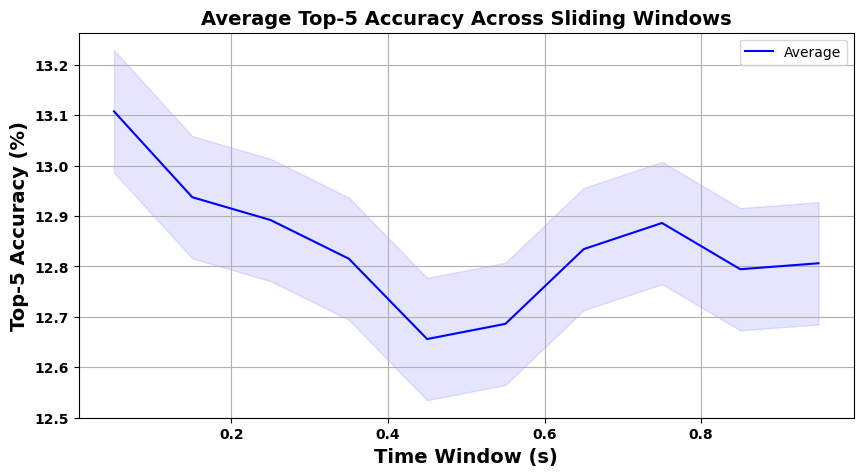

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d

subject_data = {
    'sub-01': [15.75, 12.90, 13.85, 15.10, 14.60, 15.65, 14.90, 14.15, 14.80, 13.55],
    'sub-02': [11.60, 10.35, 9.95, 10.05, 11.35, 10.80, 10.95, 11.15, 8.70, 10.20],
    'sub-03': [13.20, 15.70, 13.75, 14.80, 11.80, 14.10, 14.60, 14.50, 14.70, 15.40],
    'sub-04': [9.70, 8.50, 9.60, 10.85, 8.60, 10.65, 9.65, 9.55, 10.50, 10.65],
    'sub-05': [11.35, 11.20, 10.90, 11.65, 12.85, 11.40, 10.30, 10.80, 12.75, 11.85],
    'sub-06': [13.45, 15.30, 15.60, 14.35, 15.55, 14.80, 14.30, 15.95, 11.70, 14.85],
    'sub-07': [14.70, 12.95, 14.30, 15.10, 10.25, 13.25, 13.35, 14.60, 13.65, 13.00],
    'sub-08': [10.75, 9.65, 12.15, 8.70, 8.90, 8.80, 9.30, 9.80, 10.65, 9.80],
    'sub-09': [15.65, 12.90, 12.20, 14.85, 13.95, 14.35, 15.85, 15.80, 12.65, 13.95],
    'sub-10': [17.40, 16.55, 17.35, 15.55, 14.50, 14.40, 13.60, 17.05, 13.50, 16.40]
}

data_array = np.array(list(subject_data.values()))

average_per_segment = np.mean(data_array, axis=0)

time_segments_numeric = np.linspace(0.05, 0.95, num=10)

smoothed_average = gaussian_filter1d(average_per_segment, sigma=1)

plt.figure(figsize=(10, 5))
plt.plot(time_segments_numeric, smoothed_average, label='Average', color='blue')
plt.fill_between(time_segments_numeric, smoothed_average - np.std(smoothed_average), 
                 smoothed_average + np.std(smoothed_average), color='blue', alpha=0.1)

plt.title('Average Top-5 Accuracy Across Sliding Windows', fontsize=14, fontweight='bold')
plt.xlabel('Time Window (s)', fontsize=14, fontweight='bold')
plt.ylabel('Top-5 Accuracy (%)', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.grid(True)
plt.legend()
plt.show()

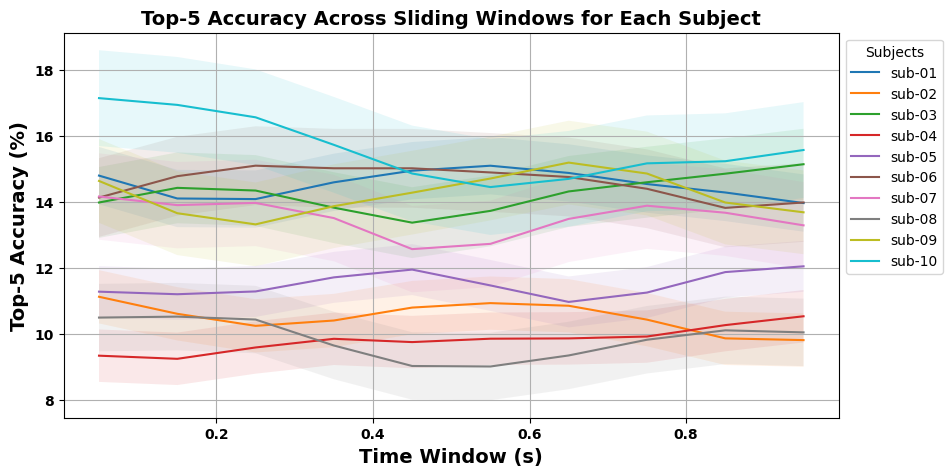

In [9]:
time_segments_numeric = np.linspace(0.05, 0.95, num=10)

# Set up the plot with specified figsize
plt.figure(figsize=(10, 5))

# Assign a unique color to each subject and plot their data with Gaussian smoothing
for subject, data in subject_data.items():
    smoothed_data = gaussian_filter1d(data, sigma=1)  # Apply Gaussian filter with sigma=1
    plt.plot(time_segments_numeric, smoothed_data, label=subject)
    std_dev = np.std(data)  # Calculate standard deviation
    plt.fill_between(time_segments_numeric, smoothed_data - std_dev, smoothed_data + std_dev, alpha=0.1)

plt.title('Top-5 Accuracy Across Sliding Windows for Each Subject', fontsize=14, fontweight='bold')
plt.xlabel('Time Window (s)', fontsize=14, fontweight='bold')
plt.ylabel('Top-5 Accuracy (%)', fontsize=14, fontweight='bold')

# Increase tick size
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

# Set the legend outside the plot. Only include this single call to ensure it's configured correctly.
plt.legend(title='Subjects', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))

plt.grid(True)

plt.show()

In [10]:
# # Convert subject data to numpy array for computation
# data_array = np.array(list(subject_data.values()))

# # Calculate the average for each time segment
# average_per_segment = np.mean(data_array, axis=0)

# # Convert time segments to numerical values
# time_segments_numeric = np.linspace(0.05, 0.95, num=10)

# # Apply Gaussian smoothing to the average
# smoothed_average = gaussian_filter1d(average_per_segment, sigma=1)

# # Set up the plot
# plt.figure(figsize=(10, 5))  # Ensure figsize is consistent for both plots
# plt.plot(time_segments_numeric, smoothed_average, label='Average', color='blue')
# plt.fill_between(time_segments_numeric, smoothed_average - np.std(smoothed_average), 
#                  smoothed_average + np.std(smoothed_average), color='blue', alpha=0.1)

# plt.title('Average Top-5 Accuracy Across Sliding Windows', fontsize=14, fontweight='bold')
# plt.xlabel('Time Window (s)', fontsize=14, fontweight='bold')
# plt.ylabel('Top-5 Accuracy (%)', fontsize=14, fontweight='bold')

# # Increase tick size
# plt.xticks(fontsize=10, fontweight='bold')
# plt.yticks(fontsize=10, fontweight='bold')

# # Place the legend outside the plot
# plt.legend(title='Subjects', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))

# plt.grid(True)

# # Use tight_layout with adjusted parameters to accommodate the external legend
# plt.tight_layout(rect=[0, 0, 0.75, 1])

# plt.show()

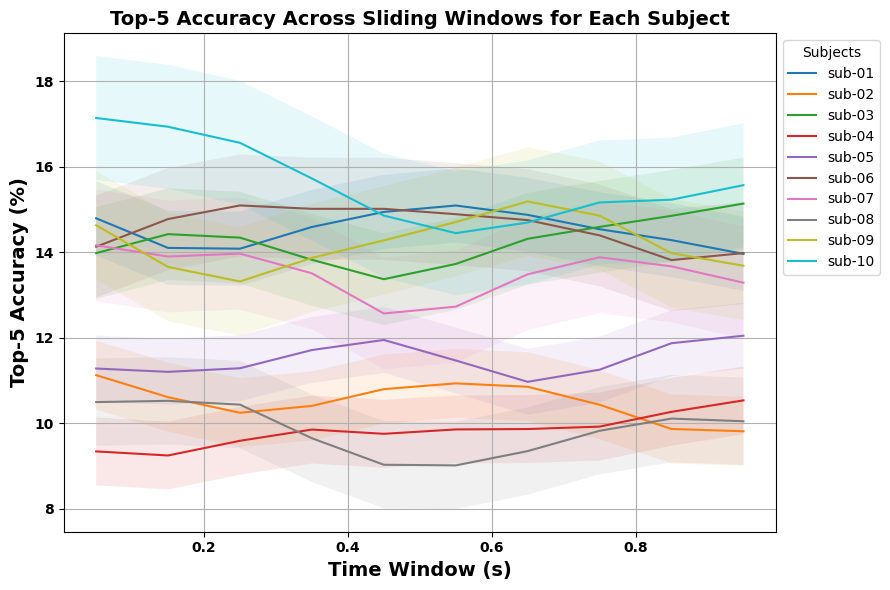

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d

# Data for all subjects
subject_data = {
    'sub-01': [15.75, 12.90, 13.85, 15.10, 14.60, 15.65, 14.90, 14.15, 14.80, 13.55],
    'sub-02': [11.60, 10.35, 9.95, 10.05, 11.35, 10.80, 10.95, 11.15, 8.70, 10.20],
    'sub-03': [13.20, 15.70, 13.75, 14.80, 11.80, 14.10, 14.60, 14.50, 14.70, 15.40],
    'sub-04': [9.70, 8.50, 9.60, 10.85, 8.60, 10.65, 9.65, 9.55, 10.50, 10.65],
    'sub-05': [11.35, 11.20, 10.90, 11.65, 12.85, 11.40, 10.30, 10.80, 12.75, 11.85],
    'sub-06': [13.45, 15.30, 15.60, 14.35, 15.55, 14.80, 14.30, 15.95, 11.70, 14.85],
    'sub-07': [14.70, 12.95, 14.30, 15.10, 10.25, 13.25, 13.35, 14.60, 13.65, 13.00],
    'sub-08': [10.75, 9.65, 12.15, 8.70, 8.90, 8.80, 9.30, 9.80, 10.65, 9.80],
    'sub-09': [15.65, 12.90, 12.20, 14.85, 13.95, 14.35, 15.85, 15.80, 12.65, 13.95],
    'sub-10': [17.40, 16.55, 17.35, 15.55, 14.50, 14.40, 13.60, 17.05, 13.50, 16.40]
}

# Convert time segments to numerical values
time_segments_numeric = np.linspace(0.05, 0.95, num=10)

# Set up the plot
plt.figure(figsize=(12, 6))

# Assign a unique color to each subject and plot their data with Gaussian smoothing
for subject, data in subject_data.items():
    smoothed_data = gaussian_filter1d(data, sigma=1)  # Apply Gaussian filter with sigma=1
    plt.plot(time_segments_numeric, smoothed_data, label=subject)
    std_dev = np.std(data)  # Calculate standard deviation
    plt.fill_between(time_segments_numeric, smoothed_data - std_dev, smoothed_data + std_dev, alpha=0.1)

plt.title('Top-5 Accuracy Across Sliding Windows for Each Subject', fontsize=14, fontweight='bold')
plt.xlabel('Time Window (s)', fontsize=14, fontweight='bold')
plt.ylabel('Top-5 Accuracy (%)', fontsize=14, fontweight='bold')

# Increase tick size
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

# Place the legend outside the plot
plt.legend(title='Subjects', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))

plt.grid(True)
plt.tight_layout(rect=[0, 0, 0.75, 1]) 

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

file_paths = ['/home/ldy/Workspace/BrainAligning/outputs/EEGConformer_Encoder_cross_sub.csv', 
              '/home/ldy/Workspace/BrainAligning/outputs/EEGITNet_Encoder_cross_sub.csv',
              '/home/ldy/Workspace/BrainAligning/outputs/EEGNetv4_Encoder_cross_sub.csv',
              '/home/ldy/Workspace/BrainAligning/outputs/ShallowFBCSPNet_Encoder_cross_sub.csv',

method_names = ['EEGConformer', 'EEGITNet', 'EEGNetv4', 'ShallowFBCSPNet', 'ATCNet', 'PFM']

markers = ['o', 's', '^', 'D', 'p', 'h']  # Circle, square, triangle up, diamond, pentagon, hexagon

# Marker size

# Number of epochs to display
num_epochs_to_display = 50

# Prepare the plot
plt.figure(figsize=(10, 6))

# Loop over each file and plot with different markers
for file_path, method_name, marker in zip(file_paths, method_names, markers):
    # Load the CSV file
    data = pd.read_csv(file_path)

    # Filter data for first 50 epochs
    data = data[data['epoch'] <= num_epochs_to_display]

    # Extract the necessary columns (assuming 'epoch' and 'test_accuracy' columns)
    epochs = data['epoch']
    test_accuracy = data['top5_acc']

    # Plot the data with larger, more distinct markers
    plt.plot(epochs, test_accuracy, label=method_name, marker=marker, markersize=marker_size)

# Adding title, labels, grid, and legend
plt.title('Test Set Accuracy Across Different Methods (TOP5)')
plt.xlabel('Epochs')
plt.ylabel('Test Set Accuracy')
plt.grid(True)
plt.legend()

# Save the plot to a file
plt.savefig("TOP5.png")

# Show the plot
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/home/ldy/Workspace/BrainAligning/outputs/EEGConformer_Encoder_cross_sub.csv'

<Figure size 1000x600 with 0 Axes>